In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation Libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
# Deep Learning Libraries
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
#from scikeras.wrappers import KerasClassifier  # Use this instead of legacy keras.wrappers

## Steps in Deep Learning - ANN :
### 01.Compiler
### 02.Model Creation
### 03.Fit Method

In [5]:
# Digit MNIST Dataset. (Input Columns Exists as Unflattened (28x28))
(X_Train, Y_Train), (X_Test, Y_Test) = mnist.load_data()

In [7]:
print(f"Number of Rows and Columns of X_Train (Before Reshaped):{X_Train.shape}")
print(f"Number of Rows and Columns of Y_Train (Before Reshaped):{Y_Train.shape}")
print(f"Number of Rows and Columns of X_Test (Before Reshaped):{X_Test.shape}")
print(f"Number of Rows and Columns of Y_Test (Before Reshaped):{Y_Test.shape}")

Number of Rows and Columns of X_Train (Before Reshaped):(60000, 28, 28)
Number of Rows and Columns of Y_Train (Before Reshaped):(60000,)
Number of Rows and Columns of X_Test (Before Reshaped):(10000, 28, 28)
Number of Rows and Columns of Y_Test (Before Reshaped):(10000,)


In [9]:
# It Shows Very First Array Set (28x28) of 6000 Rows With Gray Scale Color Codes which would be Visible as an Image Through
# plt.imshow(X_train_digit[Each_Number], cmap='gray')
X_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

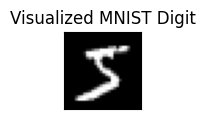

In [11]:
# It Shows Very First Array Set (28x28) of 6000 Rows With Gray Scale Color Codes which would be Visible as an Image Through
# plt.imshow(X_train_digit[Each_Number], cmap='gray')
# X_Train[0]

# Full Digit array pasted manually for visualization
digit_array_full = np.array([
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221, 253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253, 253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253, 195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]
], dtype=np.uint8)

# Plot the image
# Visualizing the digits
plt.figure(figsize=(1,1))
plt.imshow(digit_array_full, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Visualized MNIST Digit")
plt.show()

In [13]:
Y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
# It Shows Very First Integer From (1x1 Array) of 6000 Rows
Y_Train[0]

5

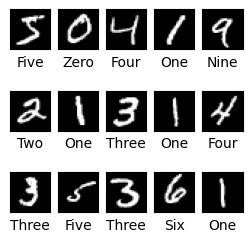

In [17]:
# Names of Numbers in the Dataset in Order
Column_Names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# Visualizing the Digits
plt.figure(figsize=(3,3))

for Each_Number in range(15):
    plt.subplot(3, 5, Each_Number + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_Train[Each_Number], cmap='gray')
    plt.xlabel(Column_Names[Y_Train[Each_Number]])

plt.show()

In [19]:
# Flattening the Rows and Columns (From 3D TO 2D), Since ANN Accepts Only 2 Dimensional Inputs 
X_Train_Flattened_To_One_Dimension = X_Train.reshape(60000, 784)
print(f"Number of Rows and Columns of X_Train_Flattened_To_One_Dimension (After Reshaped) :{X_Train_Flattened_To_One_Dimension.shape}")

X_Test_Flattened_To_One_Dimension = X_Test.reshape(10000, 784)
print(f"Number of Rows and Columns of X_Test_Flattened_To_One_Dimension (After Reshaped) :{X_Test_Flattened_To_One_Dimension.shape}")

Number of Rows and Columns of X_Train_Flattened_To_One_Dimension (After Reshaped) :(60000, 784)
Number of Rows and Columns of X_Test_Flattened_To_One_Dimension (After Reshaped) :(10000, 784)


In [21]:
# One Hot Encoding the Digit MNIST Labels. Here, num_classes=10 Refers to the Digits From 0 To 9
# Similarly Output should always be in One Hot Encoding Format for ANN

Y_Train_One_Hot_Encoded = to_categorical(Y_Train, num_classes=10)
print(f"Number of Rows and Columns of Y_Train_One_Hot_Encoded :{Y_Train_One_Hot_Encoded.shape}")

Y_Test_One_Hot_Encoded = to_categorical(Y_Test, num_classes=10)
print(f"Number of Rows and Columns of Y_Test_One_Hot_Encoded :{Y_Test_One_Hot_Encoded.shape}")

Number of Rows and Columns of Y_Train_One_Hot_Encoded :(60000, 10)
Number of Rows and Columns of Y_Test_One_Hot_Encoded :(10000, 10)


In [23]:
# Verifying the Sample Output of Y_Train (Y_Train Should be Same With Sample Output of Y_Train_One_Hot_Encoded) 
Y_Train[1]

0

In [25]:
# Verifying the Sample Output of Y_Train_One_Hot_Encoded (Y_Train_One_Hot_Encoded Should be Same With Sample Output of Y_Train)
Y_Train_One_Hot_Encoded[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
#Creating Base Neural Network
# 256 -> 128 -> 64 -> 10 are Nothing But Feed Forward and Again 10 -> 256 is Back Probagation
# Sigmoid - Its a Logistic Function (0 TO 1)

Input_Units = 784
Dense_Output_01 = 256
Dense_Output_02 = 128
Dense_Output_03 = 64
Output = 10 


model = keras.Sequential([
    layers.Dense(Dense_Output_01, activation='relu', input_shape=(Input_Units,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(Dense_Output_02, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(Dense_Output_03, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(Output,activation='sigmoid'),
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Initial Input size (Flattened 28x28 Image)
Input_Units = 784  

print("Formula To Calculate the Parameters:\n")

for i, layer in enumerate(model.layers):
    if hasattr(layer, 'units'):
        Output_Units = layer.units
        
        Parameters = (Input_Units * Output_Units) + Output_Units
       
        print(f"Layer {i+1}: {layer.name}")
        print(f"(Input_Units ({Input_Units}) × Output_Units ({Output_Units})) + Output_Units ({Output_Units}) = {Parameters} \n")
        
        # Set input for next layer
        Input_Units = Output_Units

Formula To Calculate the Parameters:

Layer 1: dense
(Input_Units (784) × Output_Units (256)) + Output_Units (256) = 200960 

Layer 2: dense_1
(Input_Units (256) × Output_Units (128)) + Output_Units (128) = 32896 

Layer 3: dense_2
(Input_Units (128) × Output_Units (64)) + Output_Units (64) = 8256 

Layer 4: dense_3
(Input_Units (64) × Output_Units (10)) + Output_Units (10) = 650 



In [33]:
# Compiling the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [35]:
Fitted_Model = model.fit(X_Train_Flattened_To_One_Dimension, Y_Train_One_Hot_Encoded, batch_size=100, epochs=10,
                         validation_data=(X_Test_Flattened_To_One_Dimension, Y_Test_One_Hot_Encoded))

Epoch 1/10


600/600 [==============================] - 8s 10ms/step - loss: 1.3004 - accuracy: 0.8702 - val_loss: 0.3040 - val_accuracy: 0.9257
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2066 - accuracy: 0.9438 - val_loss: 0.1966 - val_accuracy: 0.9484
Epoch 3/10
600/600 [==============================] - 5s 9ms/step - loss: 0.1343 - accuracy: 0.9610 - val_loss: 0.1863 - val_accuracy: 0.9530
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1086 - accuracy: 0.9685 - val_loss: 0.1957 - val_accuracy: 0.9508
Epoch 5/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0995 - accuracy: 0.9700 - val_loss: 0.1466 - val_accuracy: 0.9608
Epoch 6/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0866 - accuracy: 0.9737 - val_loss: 0.1530 - val_accuracy: 0.9614
Epoch 7/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0863 - accuracy: 0.9744 - val_loss: 0.1999 - val_accuracy: 0.9529
Epo

In [37]:
# Predicting the labels - DIGIT
Y_Predicted = model.predict(X_Test_Flattened_To_One_Dimension)

313/313 [==============================] - 1s 4ms/step


In [39]:
Y_Predicted[0]

array([0.21428604, 0.9998522 , 0.99964654, 0.9982126 , 0.00166536,
       0.48735046, 0.00190981, 1.        , 0.08410972, 0.94768834],
      dtype=float32)

In [41]:
# Here We Get the Index of Maximum Value in the Encoded Vector for y_predict
Y_Predicted_Max = np.argmax(Y_Predicted, axis=1) 
Y_Predicted_Max

array([7, 2, 1, ..., 1, 5, 0], dtype=int64)

In [43]:
# Here We Get the Index of Maximum Value in the Encoded Vector for y_test_digit
Y_Test_One_Hot_Encoded_Max = np.argmax(Y_Test_One_Hot_Encoded, axis=1)
Y_Test_One_Hot_Encoded_Max

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

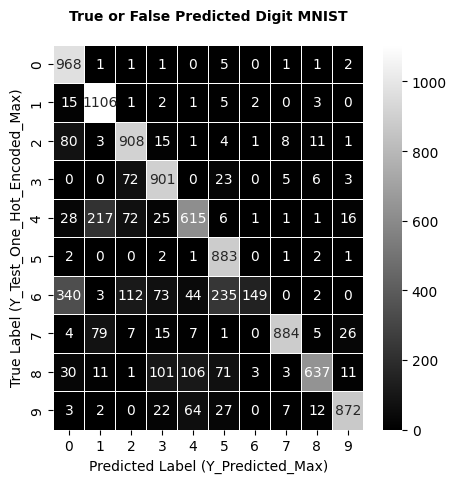

In [45]:
# Confusion Matrix for Digit MNIST
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
Confusion_Matrix = confusion_matrix(Y_Test_One_Hot_Encoded_Max, Y_Predicted_Max)

# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size': 10}, linewidths=0.5, fmt="d", cmap="gray")

plt.title('True or False Predicted Digit MNIST\n', fontweight='bold', fontsize=10)
plt.xlabel('Predicted Label (Y_Predicted_Max)')
plt.ylabel('True Label (Y_Test_One_Hot_Encoded_Max)')
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test_One_Hot_Encoded_Max, Y_Predicted_Max))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       980
           1       0.78      0.97      0.87      1135
           2       0.77      0.88      0.82      1032
           3       0.78      0.89      0.83      1010
           4       0.73      0.63      0.68       982
           5       0.70      0.99      0.82       892
           6       0.96      0.16      0.27       958
           7       0.97      0.86      0.91      1028
           8       0.94      0.65      0.77       974
           9       0.94      0.86      0.90      1009

    accuracy                           0.79     10000
   macro avg       0.82      0.79      0.77     10000
weighted avg       0.82      0.79      0.77     10000



In [49]:
print(Fitted_Model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


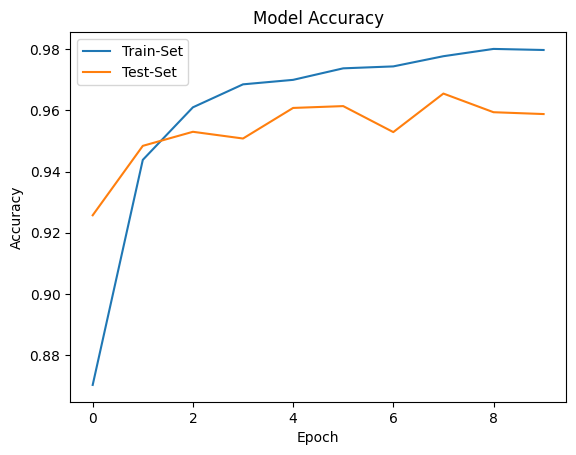

In [51]:
# summarize history for accuracy
plt.plot(Fitted_Model.history['accuracy']) #Comes in Y-Axis
plt.plot(Fitted_Model.history['val_accuracy']) #Comes in X-Axis
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train-Set', 'Test-Set'], loc='best')
plt.show()

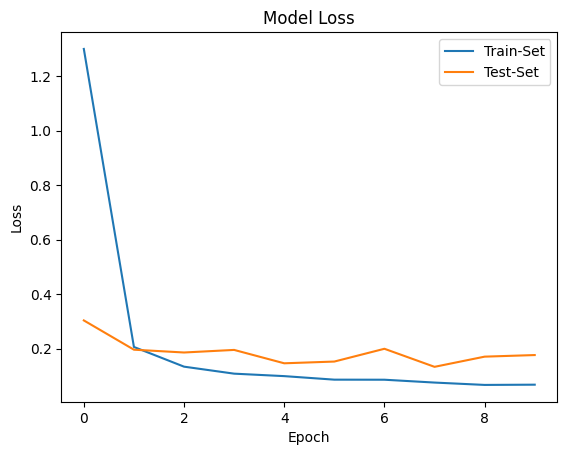

In [53]:
plt.plot(Fitted_Model.history['loss']) #Comes in Y-Axis
plt.plot(Fitted_Model.history['val_loss']) #Comes in X-Axis
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train-Set', 'Test-Set'], loc='best')
plt.show()

In [55]:
Y_Predicted_Single = model.predict(X_Test_Flattened_To_One_Dimension[[0]])

1/1 [==============================] - 0s 72ms/step


In [57]:
# Here We Get the Index of Maximum Value in the Encoded Vector for y_predict_single
Y_Predicted_Single_Max = np.argmax(Y_Predicted_Single, axis=1) 
Y_Predicted_Single_Max

array([7], dtype=int64)

In [59]:
Y_Predicted_Single_Max[0]

7

In [61]:
Y_Test_One_Hot_Encoded_Max

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [63]:
Y_Test_One_Hot_Encoded_Max[0]

7

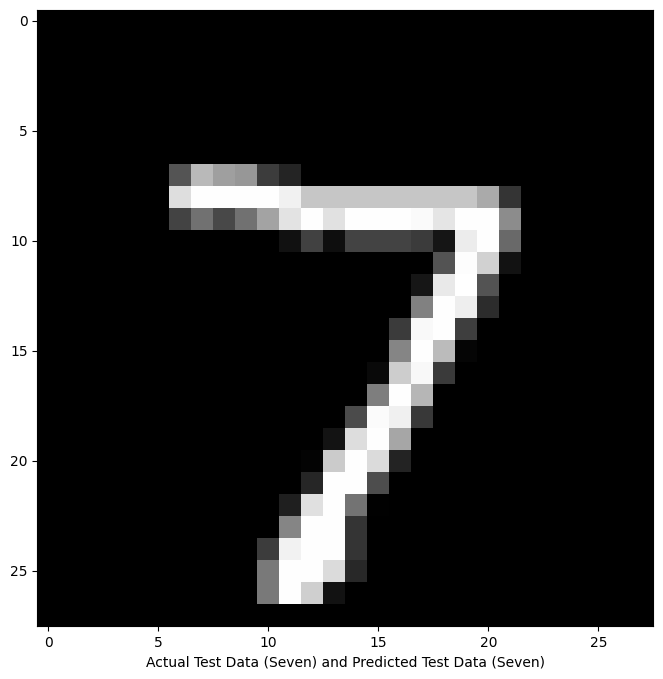

In [65]:
Test_Data_Input = X_Test_Flattened_To_One_Dimension[0]
Test_Data_Output = Y_Test_One_Hot_Encoded[0]
Test_Data_Predicted_Max = Y_Predicted_Single_Max[0]  

# Names of Numbers in the Dataset in Order
Column_Names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# Visualizing the Digits
plt.figure(figsize=(8,8))
plt.imshow(Test_Data_Input.reshape(28,28), cmap='gray')
plt.xlabel("Actual Test Data ({}) and Predicted Test Data ({})".format( Column_Names[np.argmax(Test_Data_Output)], 
                                                                               Column_Names[Test_Data_Predicted_Max]) )
plt.show()